##### Titanic Solution and approach
There are several excellent notebooks to study data science competition entries. However many will skip some of the explanation on how the solution is developed as these notebooks are developed by experts for experts. The objective of this notebook is to follow a step-by-step workflow, explaining each step and rationale for every decision we take during solution development.

Step By Step Processing of data :-

1) Understanding the Problem

2) Acquire training and testing dataI
3) Data preparation 
4) Identify the patterne and explore the data
5) Model, predict and solve the problem.
6) Visualize, report, and present the problem solving steps and final solution
7) Supply or submit the results.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/titanic/test.csv
/kaggle/input/titanic/train.csv
/kaggle/input/titanic/gender_submission.csv


****Read the data through csv file :- 

The Python Pandas packages helps us work with our datasets. We start by acquiring the training and testing datasets into Pandas DataFrames. We also combine these datasets to run certain operations on both datasets together.

In [2]:
sub_file = pd.read_csv("/kaggle/input/titanic/gender_submission.csv")
sub_file.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [3]:
train = pd.read_csv("/kaggle/input/titanic/train.csv")
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
val = pd.read_csv("/kaggle/input/titanic/test.csv")
val.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
val.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

**** Step By Step Data Preparation 
1) Find if any null coloumns are present in the data 

In [7]:
train.isnull().mean()

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

In [8]:
val.isnull().mean()

PassengerId    0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.205742
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.002392
Cabin          0.782297
Embarked       0.000000
dtype: float64

In [9]:
train.shape

(891, 12)

In [10]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [11]:
val.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


**Which features are numerical?**

Which features are numerical? These values change from sample to sample. Within numerical features are the values discrete, continuous, or timeseries based? Among other things this helps us select the appropriate plots for visualization.

1. Continous: Age, Fare. Discrete: SibSp, Parch.

**** As we get Null value columns in the data 
 Folllow the procedure step by step 
1.  1) For continous variable , calculate the mean and median for inittial step of data preparation

In [12]:
def impute_na_numeric(train,val,var):
    mean = train[var].mean()
    median = train[var].median()
    
    train[var+"_mean"] = train[var].fillna(mean)
    train[var+"_median"] = train[var].fillna(median)
    
    var_original = train[var].std()**2
    var_mean = train[var+"_mean"].std()**2
    var_median = train[var+"_median"].std()**2
    
    print("Original Variance: ",var_original)
    print("Mean Variance: ",var_mean)
    print("Median Variance: ",var_median)
    
    if((var_mean < var_original) | (var_median < var_original)):
        if(var_mean < var_median):
            train[var] = train[var+"_mean"]
            val[var] = val[var].fillna(mean)
        else:
            train[var] = train[var+"_median"]
            val[var] = val[var].fillna(median)
    else:
        val[var] = val[var].fillna(median)
    train.drop([var+"_mean",var+"_median"], axis=1, inplace=True)

In [13]:
impute_na_numeric(train,val,"Age")

Original Variance:  211.01912474630808
Mean Variance:  169.05239993721082
Median Variance:  169.51249827942328


In [14]:
impute_na_numeric(train,val,"Fare")

Original Variance:  2469.436845743117
Mean Variance:  2469.436845743117
Median Variance:  2469.436845743117


**Which features are categorical?**

* These values classify the samples into sets of similar samples. Within categorical features are the values nominal, ordinal, ratio, or interval based? Among other things this helps us select the appropriate plots for visualization.

* Categorical: Survived, Sex, and Embarked. Ordinal: Pclass.

In [15]:
train["Embarked"].mode().values[0]

'S'

In [16]:
def impute_na_non_numeric(train,val,var):
    mode = train[var].mode().values[0]
    train[var] = train[var].fillna(mode)
    val[var] = val[var].fillna(mode)

In [17]:
impute_na_non_numeric(train,val,"Embarked")

**Which features are mixed data types?**

* Numerical, alphanumeric data within same feature. These are candidates for correcting goal.

* Ticket is a mix of numeric and alphanumeric data types. Cabin is alphanumeric.
* **Which features may contain errors or typos?**

* This is harder to review for a large dataset, however reviewing a few samples from a smaller dataset may just tell us outright, which features may require correcting.

> Name feature may contain errors or typos as there are several ways used to describe a name including titles, round brackets, and quotes used for alternative or short names.

In [18]:
def impute_na_max_missing(train,val,var,prefix):
    train[prefix+"_"+var] = np.where(train[var].isna(),0,1)
    train.drop([var],axis=1,inplace=True)
    val[prefix+"_"+var] = np.where(val[var].isna(),0,1)
    val.drop([var],axis=1,inplace=True)

In [19]:
impute_na_max_missing(train,val,"Cabin","had")

** Missing Values imputed **

In [20]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,had_Cabin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0


**Combination of Two coloumns**

In [21]:
train["Family_Size"] = train["SibSp"] + train["Parch"]
val["Family_Size"] = val["SibSp"] + val["Parch"]

**Explore the Feature Engineering **
1. We can create one new coloumn with name "Salutation" from "Name" coloumn. Where all the names in "Name" column are unique but still we can apply feature engineering steps for this. Observe the coloumn and we can see that some of them are Mr. , Mrs. , Dr. With feature engineering we can extract these and make the prediction of survival on the basis of this.

In [22]:
train["Salutation"] = train["Name"].map(lambda x: x.split(',')[1].split()[0])

In [23]:
train["Salutation"].unique()

array(['Mr.', 'Mrs.', 'Miss.', 'Master.', 'Don.', 'Rev.', 'Dr.', 'Mme.',
       'Ms.', 'Major.', 'Lady.', 'Sir.', 'Mlle.', 'Col.', 'Capt.', 'the',
       'Jonkheer.'], dtype=object)

In [24]:
val["Salutation"] = val["Name"].map(lambda x: x.split(',')[1].split()[0])

In [25]:
val["Salutation"].unique()

array(['Mr.', 'Mrs.', 'Miss.', 'Master.', 'Ms.', 'Col.', 'Rev.', 'Dr.',
       'Dona.'], dtype=object)

In [26]:
val[val["Salutation"] == "Dona."]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,had_Cabin,Family_Size,Salutation
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9,C,1,0,Dona.


**Analyze by pivoting features**
* To confirm some of our observations and assumptions, we can quickly analyze our feature correlations by pivoting features against each other. We can only do so at this stage for features which do not have any empty values. It also makes sense doing so only for features which are categorical (Sex), ordinal (Pclass) or discrete (SibSp, Parch) type.
* Pclass We observe significant correlation (>0.5) among Pclass=1 and Survived (classifying #3). We decide to include this feature in our model.
* Sex We confirm the observation during problem definition that Sex=female had very high survival rate at 74% (classifying #1).
* SibSp and Parch These features have zero correlation for certain values. It may be best to derive a feature or a set of features from these individual features (creating #1).

In [27]:
def transform_with_target_probs(train,val,var,target):
    var_dict = train.groupby([var])[target].mean().to_dict()
    train[var] = train[var].map(var_dict)
    val[var] = val[var].map(var_dict)

In [28]:
transform_with_target_probs(train,val,"Pclass","Survived")

In [29]:
transform_with_target_probs(train,val,"Sex","Survived")

In [30]:
transform_with_target_probs(train,val,"Embarked","Survived")

In [31]:
train["Salutation"] = train["Salutation"].apply(lambda x: x.split('.')[0])
val["Salutation"] = val["Salutation"].apply(lambda x: x.split('.')[0])

In [32]:
def get_salutation_map(df,var,rare):
    sal_dict = {}
    for sal, count in df[var].value_counts().to_dict().items():
        count = int(count)
        if count < 10:
            sal_dict[sal] = rare
        else:
            sal_dict[sal] = sal
    return sal_dict

In [33]:
transform_with_target_probs(train,val,"Salutation","Survived")

**Analyze by visualizing data**
* Now we can continue confirming some of our assumptions using visualizations for analyzing the data.
* 
* Correlating numerical features
* Let us start by understanding correlations between numerical features and our solution goal (Survived).
* 
* A histogram chart is useful for analyzing continous numerical variables like Age where banding or ranges will help identify useful patterns. The histogram can indicate distribution of samples using automatically defined bins or equally ranged bands. This helps us answer questions relating to specific bands (Did infants have better survival rate?)
* 
* Note that x-axis in historgram visualizations represents the count of samples or passengers.
* 
**Observations.**

* Infants (Age <=4) had high survival rate.
* Oldest passengers (Age = 80) survived.
* Large number of 15-25 year olds did not survive.
* Most passengers are in 15-35 age range.
* Decisions.

**This simple analysis confirms our assumptions as decisions for subsequent workflow stages.**

* We should consider Age (our assumption classifying #2) in our model training.
* Complete the Age feature for null values (completing #1).
* We should band age groups (creating #3).

### Explore Numeric Data

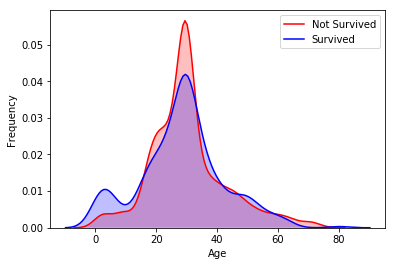

In [34]:
# Explore Age distibution 
g = sns.kdeplot(train["Age"][(train["Survived"] == 0)], color="Red", shade = True)
g = sns.kdeplot(train["Age"][(train["Survived"] == 1)], ax =g, color="Blue", shade= True)
g.set_xlabel("Age")
g.set_ylabel("Frequency")
g = g.legend(["Not Survived","Survived"])

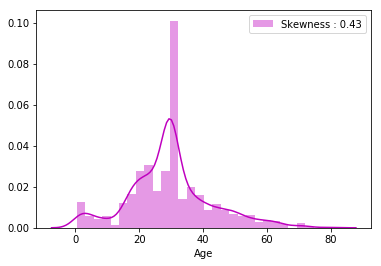

In [35]:
# Explore Age distribution 
g = sns.distplot(train["Age"], color="m", label="Skewness : %.2f"%(train["Age"].skew()))
g = g.legend(loc="best")

In [36]:
train["Fare"].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

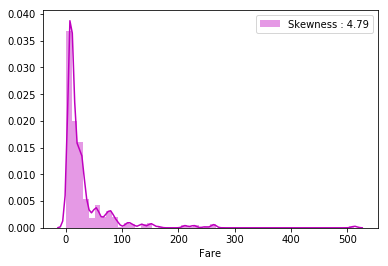

In [37]:
# Explore Fare distribution 
g = sns.distplot(train["Fare"], color="m", label="Skewness : %.2f"%(train["Fare"].skew()))
g = g.legend(loc="best")

#### Outlier Removal

In [38]:
import warnings
warnings.filterwarnings('ignore')

In [39]:
# Apply log to Fare to reduce skewness distribution
train["Fare"] = train["Fare"].map(lambda i: np.log(i) if i > 0 else 0)

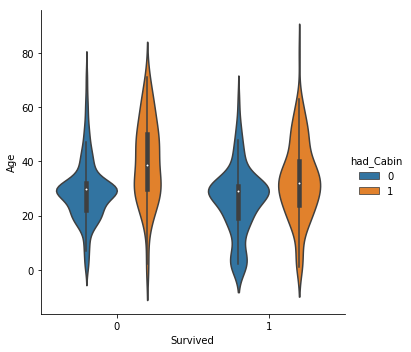

In [40]:
g = sns.factorplot(x="Survived", y = "Age", hue = "had_Cabin", data = train, kind="violin")

In [41]:
train = pd.get_dummies(train, columns=["had_Cabin"], drop_first=True)
val = pd.get_dummies(val, columns=["had_Cabin"], drop_first=True)

In [42]:
drop_cols = ['PassengerId', 'Name', 'SibSp','Parch', 'Ticket']

In [43]:
train.drop(drop_cols,axis=1).drop(["Survived"],axis=1).values

array([[ 0.24236253,  0.18890815, 22.        , ...,  1.        ,
         0.15667311,  0.        ],
       [ 0.62962963,  0.74203822, 38.        , ...,  1.        ,
         0.792     ,  1.        ],
       [ 0.24236253,  0.74203822, 26.        , ...,  0.        ,
         0.6978022 ,  0.        ],
       ...,
       [ 0.24236253,  0.74203822, 29.69911765, ...,  3.        ,
         0.6978022 ,  0.        ],
       [ 0.62962963,  0.18890815, 26.        , ...,  0.        ,
         0.15667311,  1.        ],
       [ 0.24236253,  0.18890815, 32.        , ...,  0.        ,
         0.15667311,  0.        ]])

In [44]:
train.drop(drop_cols,axis=1).drop(["Survived"],axis=1).columns

Index(['Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'Family_Size', 'Salutation',
       'had_Cabin_1'],
      dtype='object')

In [45]:
X = train.drop(drop_cols,axis=1).drop(["Survived"],axis=1).values
y = train["Survived"].values

In [46]:
val["Salutation"] = val["Salutation"].fillna(val["Salutation"].mode().values[0])
val_test = val.drop(drop_cols,axis=1).values

In [47]:
from sklearn.model_selection import train_test_split

In [48]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=101)

### Feature Scaling

#### MinMaxScaling

In [49]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()

In [50]:
mms.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [51]:
X_train_mms = mms.transform(X_train)

#### Standard Scaling

In [52]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

In [53]:
ss.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [54]:
X_train_ss = ss.transform(X_train)

#### Check Distribution after Scaling

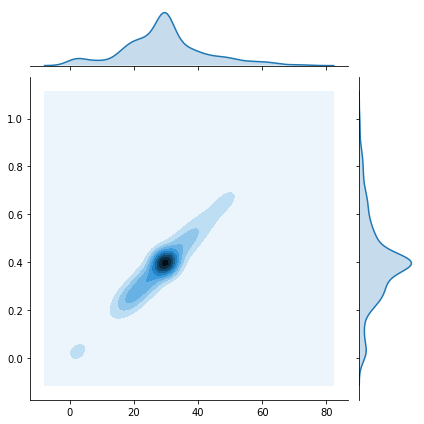

In [55]:
# For Age

sns.jointplot(X_train[:,2], X_train_mms[:,2], kind='kde')

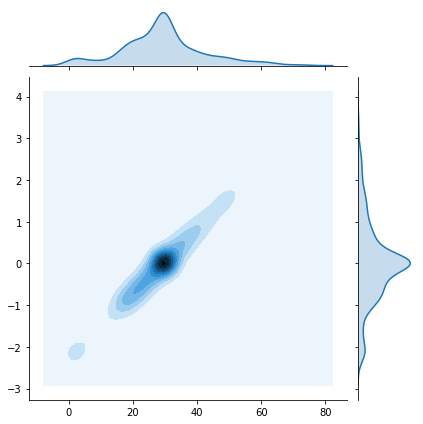

In [56]:
# For Age

sns.jointplot(X_train[:,2], X_train_ss[:,2], kind='kde')

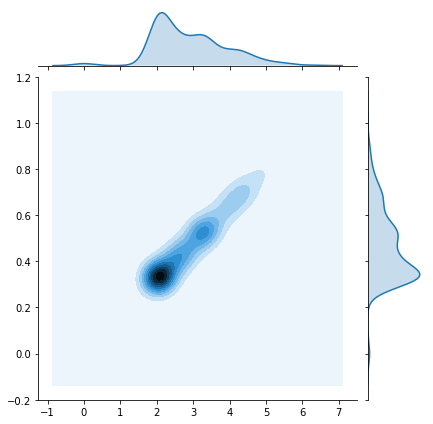

In [57]:
# For Fare

sns.jointplot(X_train[:,3], X_train_mms[:,3], kind='kde')

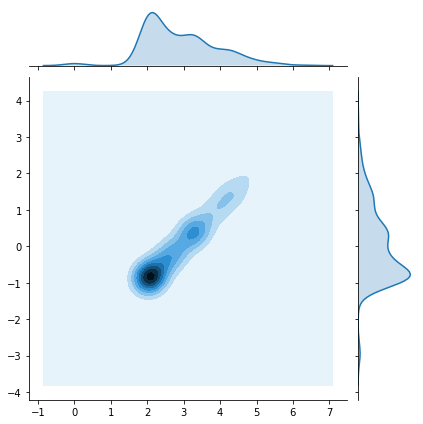

In [58]:
# For Fare

sns.jointplot(X_train[:,3], X_train_ss[:,3], kind='kde')

In [59]:
X_test_ss = ss.transform(X_test)

In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,VotingClassifier

In [61]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score

In [62]:
classification_models = ['LogisticRegression',
                         'SVC',
                         'DecisionTreeClassifier',
                         'RandomForestClassifier',
                         'AdaBoostClassifier']

In [63]:
cm = []
acc = []
prec = []
rec = []
f1 = []
models = []
estimators = []

In [64]:
for classfication_model in classification_models:
    
    model = eval(classfication_model)()
    
    model.fit(X_train_ss,y_train)
    y_pred = model.predict(X_test_ss)
    
    models.append(type(model).__name__)
    estimators.append((type(model).__name__,model))
    cm.append(confusion_matrix(y_test,y_pred))
    acc.append(accuracy_score(y_test,y_pred))
    prec.append(precision_score(y_test,y_pred))
    rec.append(recall_score(y_test,y_pred))
    f1.append(f1_score(y_test,y_pred))

### Stacking Ensemble

In [65]:
vc = VotingClassifier(estimators)
vc.fit(X_train_ss,y_train)

VotingClassifier(estimators=[('LogisticRegression',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='warn',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='warn', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('SVC',
                              SVC(C=1.0, cache_size=200, class_weight=None,
                                  coef0=0.0, dec...
                                                     min_samples_leaf=1,
                                     

In [66]:
y_pred = vc.predict(X_test_ss)
    
models.append(type(vc).__name__)

cm.append(confusion_matrix(y_test,y_pred))
acc.append(accuracy_score(y_test,y_pred))
prec.append(precision_score(y_test,y_pred))
rec.append(recall_score(y_test,y_pred))
f1.append(f1_score(y_test,y_pred))

In [67]:
model_dict = {"Models":models,
             "CM":cm,
             "Accuracy":acc,
             "Precision":prec,
             "Recall":rec,
             "f1_score":f1}

In [68]:
model_df = pd.DataFrame(model_dict)
model_df

,Models,CM,Accuracy,Precision,Recall,f1_score
0,LogisticRegression,"[[110, 17], [27, 69]]",0.802691,0.802326,0.718750,0.758242
1,SVC,"[[113, 14], [32, 64]]",0.793722,0.820513,0.666667,0.735632
2,DecisionTreeClassifier,"[[104, 23], [34, 62]]",0.744395,0.729412,0.645833,0.685083
3,RandomForestClassifier,"[[114, 13], [35, 61]]",0.784753,0.824324,0.635417,0.717647
4,AdaBoostClassifier,"[[107, 20], [29, 67]]",0.780269,0.770115,0.697917,0.732240
5,VotingClassifier,"[[110, 17], [29, 67]]",0.793722,0.797619,0.697917,0.744444


In [69]:
model_df.sort_values(by=['Accuracy','f1_score','Recall','Precision'],ascending=False,inplace=True)
model_df

,Models,CM,Accuracy,Precision,Recall,f1_score
0,LogisticRegression,"[[110, 17], [27, 69]]",0.802691,0.802326,0.718750,0.758242
5,VotingClassifier,"[[110, 17], [29, 67]]",0.793722,0.797619,0.697917,0.744444
1,SVC,"[[113, 14], [32, 64]]",0.793722,0.820513,0.666667,0.735632
3,RandomForestClassifier,"[[114, 13], [35, 61]]",0.784753,0.824324,0.635417,0.717647
4,AdaBoostClassifier,"[[107, 20], [29, 67]]",0.780269,0.770115,0.697917,0.732240
2,DecisionTreeClassifier,"[[104, 23], [34, 62]]",0.744395,0.729412,0.645833,0.685083


### Scale Test file data

In [70]:
val_test = ss.transform(val_test)

In [71]:
y_pred_sub = vc.predict(val_test)

In [72]:
sub_df = pd.concat([val['PassengerId'],
                    pd.DataFrame(y_pred_sub,columns=["Survived"])],
                   axis=1)
sub_df.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [73]:
sub_df.to_csv("Stacked_Ensemble_Baseline_Submission.csv", index=False)

##### Achieved Kaggle Score = 0.72248

### Hyper parameter Tuning

In [74]:
model_param_grid = {}

In [75]:
model_param_grid['LogisticRegression'] = {'penalty' : ['l1', 'l2'],
                                          'C' : np.logspace(0, 4, 10)}

In [76]:
model_param_grid['SVC'] = [{'kernel': ['rbf'], 
                            'gamma': [1e-2, 1e-3, 1e-4, 1e-5],
                            'C': [0.001, 0.10, 0.1, 10, 25, 50, 100, 1000]},
                           {'kernel': ['sigmoid'],
                            'gamma': [1e-2, 1e-3, 1e-4, 1e-5],
                            'C': [0.001, 0.10, 0.1, 10, 25, 50, 100, 1000]},
                           {'kernel': ['linear'], 
                            'C': [0.001, 0.10, 0.1, 10, 25, 50, 100, 1000]},
                           {'kernel': ['poly'], 
                            'degree' : [0, 1, 2, 3, 4, 5, 6]}
                          ]

In [77]:
model_param_grid['DecisionTreeClassifier'] = {'criterion' : ["gini","entropy"],
                                              'max_features': ['auto', 'sqrt', 'log2'],
                                              'min_samples_split': [2,3,4,5,6,7,8,9,10,11,12,13,14,15],
                                              'min_samples_leaf':[1,2,3,4,5,6,7,8,9,10,11]}

In [78]:
model_param_grid['RandomForestClassifier'] = {'n_estimators' : [25,50,75,100],
                                              'criterion' : ["gini","entropy"],
                                              'max_features': ['auto', 'sqrt', 'log2'],
                                              'class_weight' : ["balanced", "balanced_subsample"]}

In [79]:
model_param_grid['AdaBoostClassifier'] = {'n_estimators' : [25,50,75,100],
                                          'learning_rate' : [0.001,0.01,0.05,0.1,1,10],
                                          'algorithm' : ['SAMME', 'SAMME.R']}

#### Function to perform Grid Search with Cross Validation

In [80]:
from sklearn.model_selection import GridSearchCV
def tune_parameters(model_name,model,params,cv,scorer,X,y):
    best_model = GridSearchCV(estimator = model,
                              param_grid = params,
                              scoring = scorer,
                              cv = cv,
                              n_jobs = -1).fit(X, y)
    print("Tuning Results for ", model_name)
    print("Best Score Achieved: ",best_model.best_score_)
    print("Best Parameters Used: ",best_model.best_params_)
    return best_model

#### Define custom Scorer function

In [81]:
from sklearn.metrics import make_scorer

# Define scorer
def f1_metric(y_test, y_pred):
    score = f1_score(y_test, y_pred)
    return score

In [82]:
# Scorer function would try to maximize calculated metric
f1_scorer = make_scorer(f1_metric,greater_is_better=True)

#### Run iterations for all the trained baseline models

In [83]:
best_estimators = []

In [84]:
for m_name, m_obj in estimators:
    best_estimators.append((m_name,tune_parameters(m_name,
                                                   m_obj,
                                                   model_param_grid[m_name],
                                                   10,
                                                   f1_scorer,
                                                   X_train_ss,
                                                   y_train)))

Tuning Results for  LogisticRegression
Best Score Achieved:  0.772526649575978
Best Parameters Used:  {'C': 2.7825594022071245, 'penalty': 'l1'}


/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Tuning Results for  SVC
Best Score Achieved:  0.7841126440334751
Best Parameters Used:  {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}


/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Tuning Results for  DecisionTreeClassifier
Best Score Achieved:  0.7766172606111509
Best Parameters Used:  {'criterion': 'gini', 'max_features': 'sqrt', 'min_samples_leaf': 8, 'min_samples_split': 15}


/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Tuning Results for  RandomForestClassifier
Best Score Achieved:  0.7680995686026232
Best Parameters Used:  {'class_weight': 'balanced_subsample', 'criterion': 'entropy', 'max_features': 'log2', 'n_estimators': 50}
Tuning Results for  AdaBoostClassifier
Best Score Achieved:  0.7786708258098042
Best Parameters Used:  {'algorithm': 'SAMME', 'learning_rate': 0.1, 'n_estimators': 75}


In [85]:
tuned_estimators = []

In [86]:
tuned_lr = LogisticRegression(C=2.7825594022071245, 
                              penalty = 'l1')
tuned_lr.fit(X_train_ss,y_train)
tuned_estimators.append(("LogisticRegression",tuned_lr))

In [87]:
tuned_svc = SVC(C = 10, gamma = 0.01, kernel = 'rbf', probability=True)
tuned_svc.fit(X_train_ss,y_train)
tuned_estimators.append(("SVC",tuned_svc))

In [88]:
tuned_dt = DecisionTreeClassifier(criterion = 'entropy', 
                                  max_features = 'log2', 
                                  min_samples_leaf = 5, 
                                  min_samples_split = 11)
tuned_dt.fit(X_train_ss,y_train)
tuned_estimators.append(("DecisionTreeClassifier",tuned_dt))

In [89]:
tuned_rf = RandomForestClassifier(class_weight = 'balanced_subsample', 
                                  criterion = 'gini', 
                                  max_features = 'sqrt', 
                                  n_estimators = 100)
tuned_rf.fit(X_train_ss,y_train)
tuned_estimators.append(("RandomForestClassifier",tuned_rf))

In [90]:
tuned_adb = AdaBoostClassifier(algorithm = 'SAMME', 
                                  learning_rate = 0.1, 
                                  n_estimators = 75)
tuned_adb.fit(X_train_ss,y_train)
tuned_estimators.append(("AdaBoostClassifier",tuned_adb))

In [91]:
tuned_vc = VotingClassifier(tuned_estimators)
tuned_vc.fit(X_train_ss,y_train)

VotingClassifier(estimators=[('LogisticRegression',
                              LogisticRegression(C=2.7825594022071245,
                                                 class_weight=None, dual=False,
                                                 fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='warn',
                                                 n_jobs=None, penalty='l1',
                                                 random_state=None,
                                                 solver='warn', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('SVC',
                              SVC(C=10, cache_size=200, class_weight=None...
                                                     min_samples_leaf=1,
                        

In [92]:
y_pred_tuned_sub = tuned_vc.predict(val_test)
tuned_sub_df = pd.concat([val['PassengerId'],
                          pd.DataFrame(y_pred_tuned_sub,columns=["Survived"])],
                         axis=1)
tuned_sub_df.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [93]:
tuned_sub_df.to_csv("Stacked_Ensemble_Tuned_Submission.csv", index=False)